# MNIST Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os


In [2]:
from tensorflow.keras import datasets

(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data(path="mnist.npz")

In [3]:
X_train.shape

(60000, 28, 28)

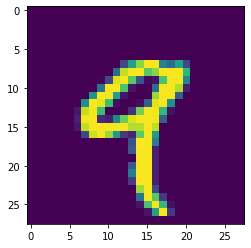

In [4]:
fig, ax = plt.subplots()
for i in range(5):
    ax.imshow(X_train[i])

In [5]:
X_train, X_test = X_train/255,X_test/255

In [5]:
# YOUR CODE HERE

### (1.3) Inputs' dimensionality

❓ **Question: What is the shape of your images** ❓

(60000, 28, 28)


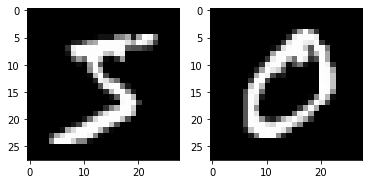

In [6]:
print(X_train.shape)
plt.subplot(1,2,1)
plt.imshow(X_train[0], cmap="gray");
plt.subplot(1,2,2)
plt.imshow(X_train[1], cmap="gray");

In [7]:
from tensorflow.keras.backend import expand_dims

In [8]:
X_texpanded = expand_dims(X_test)

2022-07-18 16:42:15.688285: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
X_trainxpanded = expand_dims(X_train)

In [10]:
X_trainxpanded[0]

<tf.Tensor: shape=(28, 28, 1), dtype=float64, numpy=
array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],

### (1.4) Label encoding

One more thing to do to prepare your data is to convert your labels to "*one-hot encode*" the categories.

❓ **Question: encoding the labels** ❓ 

* Use **`to_categorical`** to transform your labels. 
* Store the results into two variables that you can call **`y_train_cat`** and **`y_test_cat`**.

In [11]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat= to_categorical(y_test)

In [12]:
y_test_cat

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [52]:
from tensorflow.keras import layers
from tensorflow.keras import models, callbacks


def initialize_model():

    model = models.Sequential()
    
    ### First Convolution & MaxPooling
    model.add(layers.Conv2D(8, (4,4), input_shape=(28, 28, 1), padding='same', activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    ### Second Convolution & MaxPooling
    model.add(layers.Conv2D(16, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2))) 
    
    ### Flattening
    model.add(layers.Flatten())
    
    ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(10, activation='relu')) # intermediate layer
    
    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(10, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
    
    return model

In [63]:
model = initialize_model()

In [64]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 8)         136       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 8)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 12, 12, 16)        1168      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 6, 6, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                5770      
_________________________________________________________________
dense_9 (Dense)              (None, 10)               

In [65]:
checkpoint_path = "training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


### (2.2) Training a CNN

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping()

model.fit(x=X_trainxpanded, y=y_train_cat,
          epochs=10,
          validation_split=.2,
          callbacks=[cp_callback])

Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3613 - accuracy: 0.8893 - val_loss: 0.1557 - val_accuracy: 0.9510

Epoch 00001: saving model to training_1/cp.ckpt
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1175 - accuracy: 0.9653 - val_loss: 0.0877 - val_accuracy: 0.9732

Epoch 00002: saving model to training_1/cp.ckpt
Epoch 3/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0841 - accuracy: 0.9746 - val_loss: 0.0857 - val_accuracy: 0.9743

Epoch 00003: saving model to training_1/cp.ckpt
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0678 - accuracy: 0.9795 - val_loss: 0.0726 - val_accuracy: 0.9769

Epoch 00004: saving model to training_1/cp.ckpt
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0558 - accuracy: 0.9825 - val_loss: 0.0617 - val_accuracy: 0.9816

Epoch 00005: saving model to training_1/cp.ckpt
Epoch 6/10
1500/1500 [=============

### (2.3) Evaluating its performance

❓ **Question: Evaluating your CNN** ❓ 

What is your **`accuracy on the test set?`**

In [67]:
model.evaluate(X_texpanded,y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9870


[0.042147982865571976, 0.9869999885559082]

In [68]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


🎉 You should already be impressed by your CNN skills! Reaching over 95% accuracy!

🔥 You solved what was a very hard problem 30 years ago with your own CNN.

🏁 **Congratulations!**

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!

array([7])

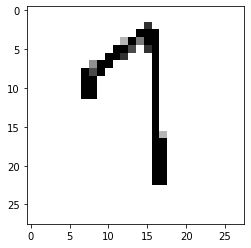

In [182]:
from PIL import Image
from numpy import asarray
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models, callbacks
import os


image = Image.open('img/imageformodel.png').convert('P')
image = image.resize((252,252),Image.ANTIALIAS)
image = image.resize((28,28),Image.ANTIALIAS)
plt.imshow(image)
# convert image to numpy array
data = (asarray(image)/8).reshape(1,28,28,1)

model.predict_classes(tf.constant(data))




array([[0.092, 0.119, 0.174, 0.128, 0.015, 0.106, 0.023, 0.228, 0.036,
        0.079]], dtype=float32)

2

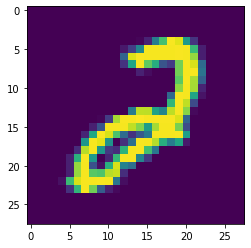

In [177]:
plt.imshow(X_trainxpanded[555])
model.predict(X_trainxpanded[555].numpy().reshape(1,28,28,1)).argmax()

5